In [23]:
# @title Welcome

from IPython.display import HTML

HTML('''
<div style="padding: 20px; background: linear-gradient(90deg, #a64ac9, #ff66b2); color: white; text-align: center; border-radius: 10px; font-size: 28px; font-weight: bold;">
  iAAA: Mathematics of Machine Learning
</div>
''')

### 📝 Notebook Topic: *Probabilistics & Statistics*  
👨‍🏫 Lecturer: *Hadi Asheri*  
📅 Date: *[YYYY-MM-DD]*


---

<h1 style='text-align: right;'>
بررسی پراکندگی داده‌های توزیع نرمال
</h1>

In [24]:
# @title Section 1: Data Variation Analysis for Normal Distribution Data
from IPython.display import HTML

HTML('''
<div style="padding: 12px; background: linear-gradient(to right, #c471ed, #f7797d); color: white; font-size: 22px; border-radius: 8px; margin-top: 20px;">
  📘 Section 1: Data Variation Analysis for Normal Distribution Data
</div>
''')

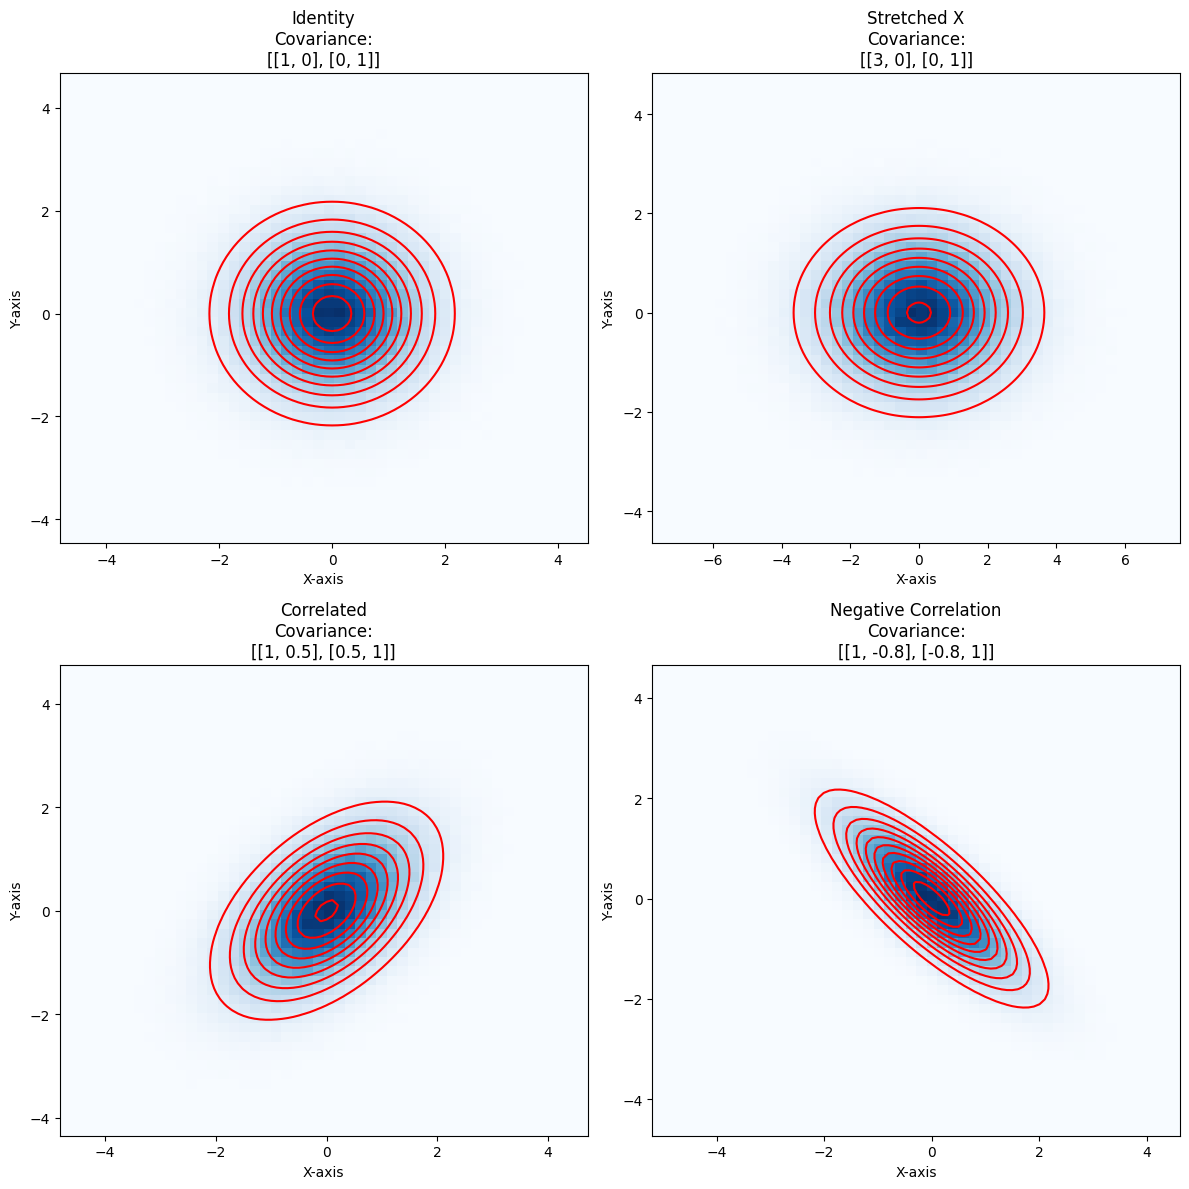

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

# Define the mean and several covariance matrices
mean = [0, 0]
covariances = {
    "Identity": [[1, 0], [0, 1]],                # Circular distribution
    "Stretched X": [[3, 0], [0, 1]],               # Elongated along X axis
    "Correlated": [[1, 0.5], [0.5, 1]],            # Tilted ellipse (positive correlation)
    "Negative Correlation": [[1, -0.8], [-0.8, 1]] # Tilted ellipse (negative correlation)
}

# Create a grid for plotting the PDF contours
x, y = np.mgrid[-4:4:0.1, -4:4:0.1]
pos = np.dstack((x, y))

# Set up the subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 12))

for ax, (title, cov) in zip(axes.flatten(), covariances.items()):
    # Generate random samples from the 2D normal distribution
    samples = np.random.multivariate_normal(mean, cov, 500000)

    # Plot a 2D histogram (density map)
    h = ax.hist2d(samples[:, 0], samples[:, 1], bins=50, cmap='Blues', density=True)

    # Create the multivariate normal distribution to compute the PDF over the grid
    rv = multivariate_normal(mean, cov)
    pdf_values = rv.pdf(pos)
    # Plot the contour lines (balance curves) corresponding to the PDF
    contour_levels = 10
    cs = ax.contour(x, y, pdf_values, levels=contour_levels, colors='red', linewidths=1.5)
    ax.set_title(f"{title}\nCovariance:\n{cov}")
    ax.set_xlabel("X-axis")
    ax.set_ylabel("Y-axis")

plt.tight_layout()
plt.show()


<h1 style='text-align: right;'>
محاسبه میانگین، میانه و مد
</h1>

In [26]:
# @title Section 2: Computing Mean, Median and Mode
from IPython.display import HTML

HTML('''
<div style="padding: 12px; background: linear-gradient(to right, #c471ed, #f7797d); color: white; font-size: 22px; border-radius: 8px; margin-top: 20px;">
  📘 Section 2: Computing Mean, Median and Mode
</div>
''')

(150,)
Mean: 5.84
Median: 5.80
Mode: 5.00


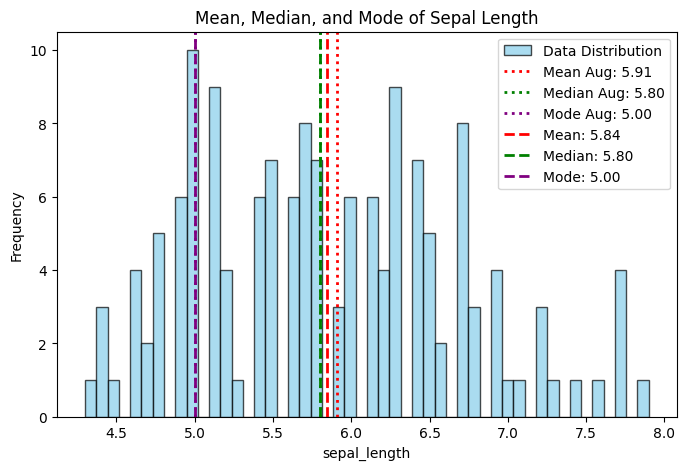

In [27]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Load real dataset (Iris dataset)
url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv"
df = pd.read_csv(url)

# Select one numeric column for analysis
column = 'sepal_length'

# Compute mean, median, and mode
mean_value = np.mean(df[column])
median_value = np.median(df[column])
mode_value = stats.mode(df[column])[0]

df_noisy = df[column].copy()
df_noisy[:2] = df_noisy[:2]*2
# df_noisy[-2:] = df_noisy[-2:]*1.2

print(df_noisy.shape)

mean_value_augmented = np.mean(df_noisy)
median_value_augmented = np.median(df_noisy)
mode_value_augmented = stats.mode(df_noisy)[0]

print(f"Mean: {mean_value:.2f}")
print(f"Median: {median_value:.2f}")
print(f"Mode: {mode_value:.2f}")

# Visualize mean, median, and mode
plt.figure(figsize=(8,5))
plt.hist(df[column], bins=50, color='skyblue', edgecolor='black', alpha=0.7, label='Data Distribution')

plt.axvline(mean_value_augmented, color='red', linestyle='dotted', linewidth=2, label=f'Mean Aug: {mean_value_augmented:.2f}')
plt.axvline(median_value_augmented, color='green', linestyle='dotted', linewidth=2, label=f'Median Aug: {median_value_augmented:.2f}')
plt.axvline(mode_value_augmented, color='purple', linestyle='dotted', linewidth=2, label=f'Mode Aug: {mode_value_augmented:.2f}')


plt.axvline(mean_value, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_value:.2f}')
plt.axvline(median_value, color='green', linestyle='dashed', linewidth=2, label=f'Median: {median_value:.2f}')
plt.axvline(mode_value, color='purple', linestyle='dashed', linewidth=2, label=f'Mode: {mode_value:.2f}')



plt.xlabel(column)
plt.ylabel('Frequency')
plt.title('Mean, Median, and Mode of Sepal Length')
plt.legend()
plt.show()


<h1 style='text-align: right;'>
نمودار جعبه‌ای
</h1>

In [28]:
# @title Section 3: Box Plot
from IPython.display import HTML

HTML('''
<div style="padding: 12px; background: linear-gradient(to right, #c471ed, #f7797d); color: white; font-size: 22px; border-radius: 8px; margin-top: 20px;">
  📘 Section 3: Box Plot
</div>
''')

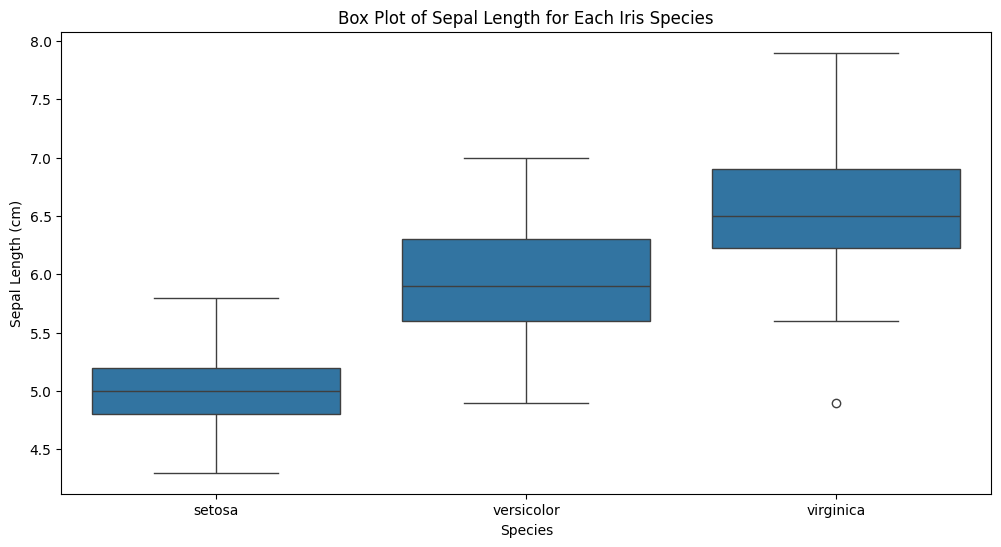

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import pandas as pd

# Load the Iris dataset
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = [iris.target_names[i] for i in iris.target]

# Set the figure size
plt.figure(figsize=(12, 6))

# Create a boxplot using Seaborn
sns.boxplot(x='species', y='sepal length (cm)', data=df)
plt.title('Box Plot of Sepal Length for Each Iris Species')
plt.xlabel('Species')
plt.ylabel('Sepal Length (cm)')

# Show the plot
plt.show()


<h1 style='text-align: right;'>
تخمین درست‌نمایی بیشینه توزیع نرمال
</h1>

In [30]:
# @title Section 4: Maximum Likelihood Estimation of the Normal Distribution
from IPython.display import HTML

HTML('''
<div style="padding: 12px; background: linear-gradient(to right, #c471ed, #f7797d); color: white; font-size: 22px; border-radius: 8px; margin-top: 20px;">
  📘 Section 4: Maximum Likelihood Estimation of the Normal Distribution
</div>
''')

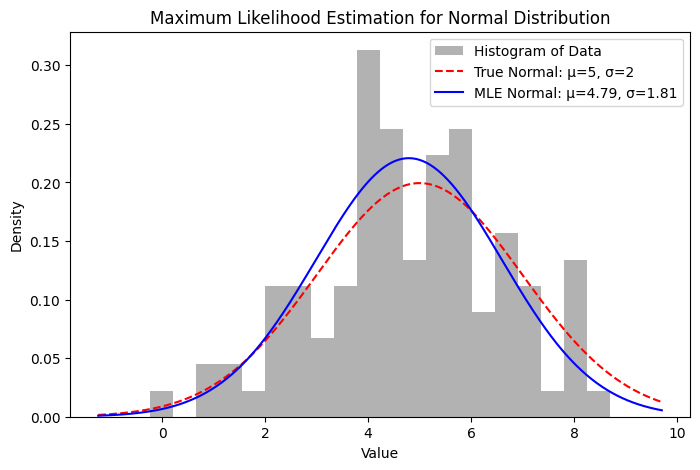

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Generate random data from a normal distribution
np.random.seed(42)
true_mu, true_sigma = 5, 2  # True parameters
data = np.random.normal(true_mu, true_sigma, 100)

# Maximum Likelihood Estimation (MLE)
mle_mu = np.mean(data)  # MLE for mean (sample mean)
mle_sigma = np.std(data, ddof=0)  # MLE for standard deviation

# Plot the true and estimated distributions
x = np.linspace(min(data) - 1, max(data) + 1, 1000)
true_pdf = norm.pdf(x, true_mu, true_sigma)  # True distribution
mle_pdf = norm.pdf(x, mle_mu, mle_sigma)  # Estimated distribution

plt.figure(figsize=(8, 5))
plt.hist(data, bins=20, density=True, alpha=0.6, color='gray', label="Histogram of Data")
plt.plot(x, true_pdf, 'r', linestyle='dashed', label=f"True Normal: μ={true_mu}, σ={true_sigma}")
plt.plot(x, mle_pdf, 'b', label=f"MLE Normal: μ={mle_mu:.2f}, σ={mle_sigma:.2f}")
plt.xlabel("Value")
plt.ylabel("Density")
plt.title("Maximum Likelihood Estimation for Normal Distribution")
plt.legend()
plt.show()


<h1 style='text-align: right;'>
توزیع نرمال
</h1>

In [32]:
# @title Section 5: Normal Distribution
from IPython.display import HTML

HTML('''
<div style="padding: 12px; background: linear-gradient(to right, #c471ed, #f7797d); color: white; font-size: 22px; border-radius: 8px; margin-top: 20px;">
  📘 Section 5: Normal Distribution
</div>
''')

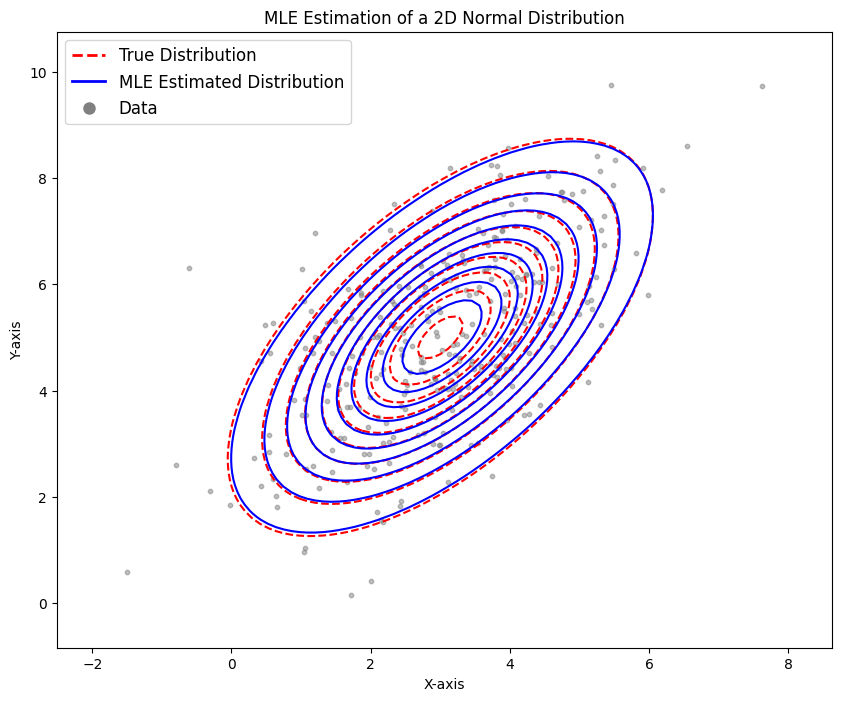

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from matplotlib.lines import Line2D

# Seed for reproducibility
np.random.seed(42)

# True parameters for the 2D Normal Distribution
true_mu = np.array([3, 5])              # True mean vector
true_cov = np.array([[2, 1.5],
                     [1.5, 3]])          # True covariance matrix

# Generate random data from the true bivariate normal distribution
n_samples = 300
data = np.random.multivariate_normal(true_mu, true_cov, n_samples)

# Maximum Likelihood Estimation (MLE)
# For a normal distribution, the MLE for the mean is the sample mean:
mle_mu = np.mean(data, axis=0)
# And the MLE for the covariance is given by:
mle_cov = np.dot((data - mle_mu).T, (data - mle_mu)) / n_samples
# (Note: np.cov by default normalizes by (n-1), so we compute it manually)

# Create a grid for visualization
x = np.linspace(np.min(data[:, 0]) - 1, np.max(data[:, 0]) + 1, 100)
y = np.linspace(np.min(data[:, 1]) - 1, np.max(data[:, 1]) + 1, 100)
X, Y = np.meshgrid(x, y)
pos = np.dstack((X, Y))

# Calculate the PDF values for both the true and estimated parameters
true_pdf = stats.multivariate_normal(true_mu, true_cov).pdf(pos)
mle_pdf = stats.multivariate_normal(mle_mu, mle_cov).pdf(pos)

# Plot the data and the density contours
plt.figure(figsize=(10, 8))
plt.scatter(data[:, 0], data[:, 1], s=10, color='gray', alpha=0.5)

# Contour plot for the true distribution (dashed red lines)
cs1 = plt.contour(X, Y, true_pdf, levels=10, colors='red', linestyles='dashed')
# Contour plot for the MLE estimated distribution (solid blue lines)
cs2 = plt.contour(X, Y, mle_pdf, levels=10, colors='blue')

# Create custom legend handles
legend_elements = [
    Line2D([0], [0], color='red', lw=2, linestyle='dashed', label='True Distribution'),
    Line2D([0], [0], color='blue', lw=2, label='MLE Estimated Distribution'),
    Line2D([0], [0], marker='o', color='gray', lw=0, label='Data', markersize=8)
]
plt.legend(handles=legend_elements, fontsize=12)
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("MLE Estimation of a 2D Normal Distribution")
plt.show()


<h1 style='text-align: right;'>
تخمین پارامترهای نرمال برای یک دیتاست
</h1>

In [34]:
# @title Section 6: Normal Parameters Estimation
from IPython.display import HTML

HTML('''
<div style="padding: 12px; background: linear-gradient(to right, #c471ed, #f7797d); color: white; font-size: 22px; border-radius: 8px; margin-top: 20px;">
  📘 Section 6: Normal Parameters Estimation
</div>
''')

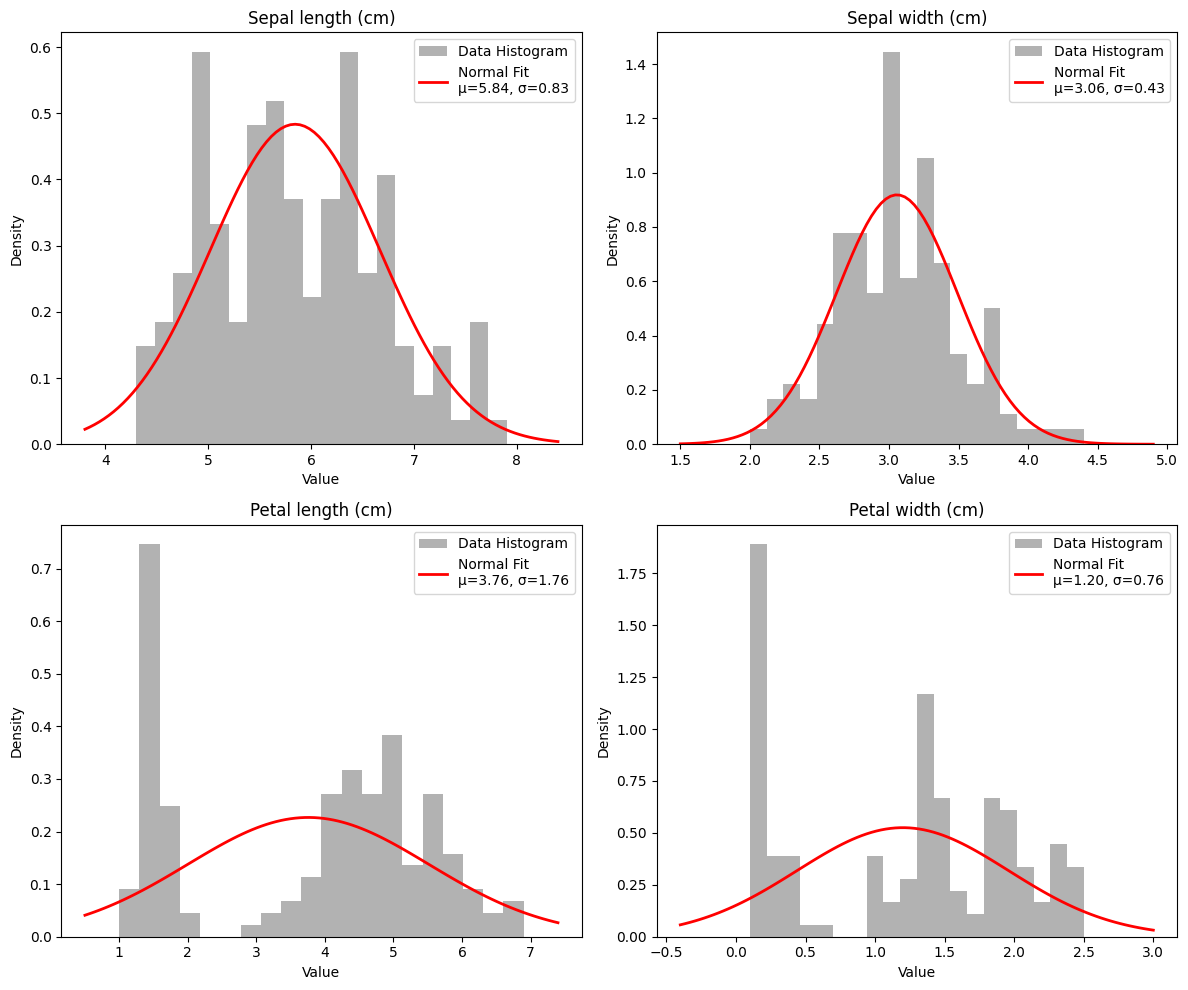

In [35]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
X = iris.data                  # Features array (150 samples x 4 features)
feature_names = iris.feature_names

# Set up a 2x2 grid for the four features
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.ravel()  # Flatten the 2D grid to 1D

# Loop over each feature to compute MLE parameters and visualize
for i, ax in enumerate(axes):
    feature = X[:, i]

    # MLE estimates for normal distribution parameters
    mle_mu = np.mean(feature)                # Sample mean
    mle_sigma = np.std(feature, ddof=0)        # Standard deviation (MLE uses ddof=0)

    # Plot the histogram of the feature data
    ax.hist(feature, bins=20, density=True, alpha=0.6,
            color='gray', label='Data Histogram')

    # Compute the fitted normal PDF across a range of x-values
    x_values = np.linspace(feature.min() - 0.5, feature.max() + 0.5, 100)
    fitted_pdf = stats.norm.pdf(x_values, loc=mle_mu, scale=mle_sigma)
    ax.plot(x_values, fitted_pdf, 'r-', lw=2,
            label=f'Normal Fit\nμ={mle_mu:.2f}, σ={mle_sigma:.2f}')

    # Labeling
    ax.set_title(feature_names[i].capitalize())
    ax.set_xlabel("Value")
    ax.set_ylabel("Density")
    ax.legend()

plt.tight_layout()
plt.show()


<h1 style='text-align: right;'>
توزیع برنولی
</h1>

In [36]:
# @title Section 7: Bernouli Distribution
from IPython.display import HTML

HTML('''
<div style="padding: 12px; background: linear-gradient(to right, #c471ed, #f7797d); color: white; font-size: 22px; border-radius: 8px; margin-top: 20px;">
  📘 Section 7: Bernouli Distribution
</div>
''')

Prior parameters: mu0 = 5.00, tau0 = 1.00
Data: sample mean (x̄) = 5.84, sigma (assumed known) = 0.83, n = 150
Posterior parameters: mu_n = 5.84, tau_n = 0.07


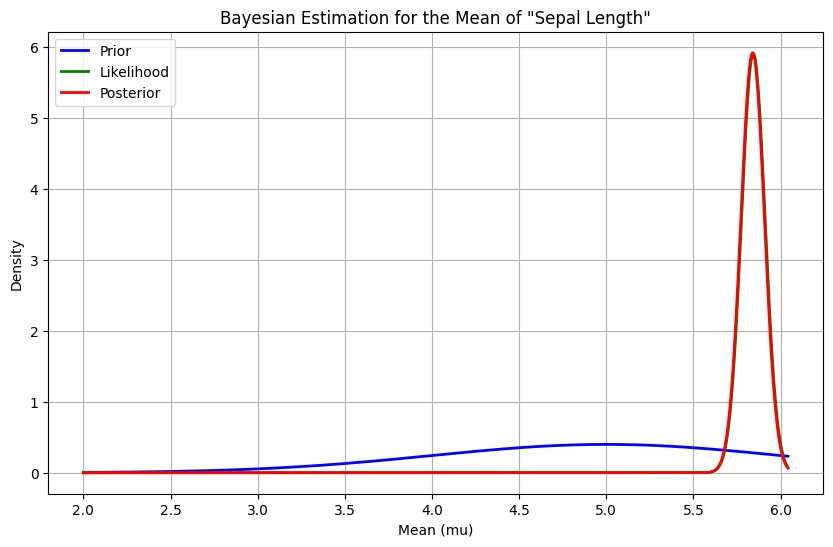

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

# -----------------------------------------------
# Step 1: Load real dataset and select a feature
# -----------------------------------------------
url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv"
df = pd.read_csv(url)
data = df['sepal_length'].values

# -----------------------------------------------
# Step 2: Compute data statistics
# -----------------------------------------------
n = len(data)                    # number of observations
x_bar = np.mean(data)            # sample mean
# Here we assume the variance is known.
# For illustration, we use the sample std as the known sigma.
sigma_known = np.std(data, ddof=1)

# -----------------------------------------------
# Step 3: Set up the Bayesian model for the mean
# -----------------------------------------------
# Likelihood: x_i ~ N(mu, sigma_known^2)
# Prior: mu ~ N(mu0, tau0^2)
# Choose prior parameters (these can be set based on prior knowledge)
mu0 = 5.0      # prior mean (our belief before seeing the data)
tau0 = 1.0     # prior standard deviation (uncertainty in the prior)

# -----------------------------------------------
# Step 4: Compute the posterior parameters
# -----------------------------------------------
# With a Normal likelihood and Normal prior the posterior for mu is:
#   mu | data ~ N(mu_n, tau_n^2)
# where:
#   1/tau_n^2 = 1/tau0^2 + n/sigma_known^2
#   mu_n = tau_n^2 * (mu0/tau0^2 + n*x_bar/sigma_known^2)

posterior_variance = 1 / (1/tau0**2 + n/sigma_known**2)
posterior_std = np.sqrt(posterior_variance)
posterior_mean = posterior_variance * (mu0/tau0**2 + n*x_bar/sigma_known**2)

print("Prior parameters: mu0 = {:.2f}, tau0 = {:.2f}".format(mu0, tau0))
print("Data: sample mean (x̄) = {:.2f}, sigma (assumed known) = {:.2f}, n = {}".format(x_bar, sigma_known, n))
print("Posterior parameters: mu_n = {:.2f}, tau_n = {:.2f}".format(posterior_mean, posterior_std))

# -----------------------------------------------
# Step 5: Visualize the Prior, Likelihood, & Posterior
# -----------------------------------------------
# Create a grid of mu values (the parameter we are estimating)
mu_range = np.linspace(mu0 - 3*tau0, posterior_mean + 3*posterior_std, 1000)

# Compute the prior density for mu
prior_pdf = norm.pdf(mu_range, loc=mu0, scale=tau0)

# The likelihood as a function of mu is proportional to:
#   L(mu) ∝ exp(-n*(x_bar - mu)^2/(2*sigma_known^2))
# For illustration we show it normalized as a pdf with mean = x_bar and variance = sigma_known^2/n.
likelihood_pdf = norm.pdf(mu_range, loc=x_bar, scale=sigma_known/np.sqrt(n))

# Compute the posterior density for mu
posterior_pdf = norm.pdf(mu_range, loc=posterior_mean, scale=posterior_std)

# Plot all three curves
plt.figure(figsize=(10, 6))
plt.plot(mu_range, prior_pdf, label='Prior', color='blue', linewidth=2)
plt.plot(mu_range, likelihood_pdf, label='Likelihood', color='green', linewidth=2)
plt.plot(mu_range, posterior_pdf, label='Posterior', color='red', linewidth=2)
plt.xlabel('Mean (mu)')
plt.ylabel('Density')
plt.title('Bayesian Estimation for the Mean of "Sepal Length"')
plt.legend()
plt.grid(True)
plt.show()


<h1 style='text-align: right;'>
تکرارهای تخمین بیزین
</h1>

In [38]:
# @title Section 8: Bayes Estimation Repetition
from IPython.display import HTML

HTML('''
<div style="padding: 12px; background: linear-gradient(to right, #c471ed, #f7797d); color: white; font-size: 22px; border-radius: 8px; margin-top: 20px;">
  📘 Section 8: Bayes Estimation Repetition
</div>
''')

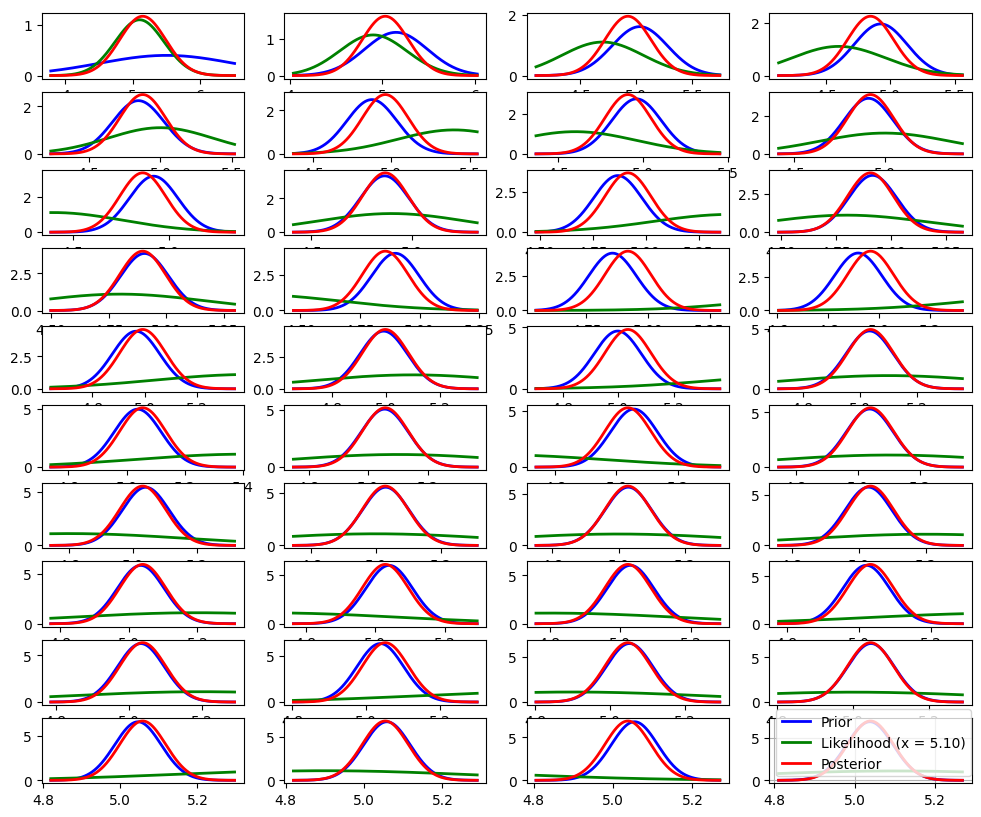

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm

# -------------------------------
# Step 1: Load and prepare the data
# -------------------------------
url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv"
df = pd.read_csv(url)
# For demonstration, we use the first 40 observations of the 'sepal_length' feature in the Iris dataset.
data = df['sepal_length'].values[:40]

# Assume that the variance is known. For illustration, we use the sample standard deviation as the known sigma.
sigma_known = np.std(data, ddof=1)

# -------------------------------
# Step 2: Set initial prior parameters
# -------------------------------
# Our unknown mean (mu) is assumed to have a prior distribution: mu ~ N(mu_prior, tau_prior^2)
mu_prior = 5.5        # initial guess
tau_prior = 1.0       # initial uncertainty (standard deviation) in the prior

# -------------------------------
# Step 3: Iteratively update the prior as new data arrive
# -------------------------------
plt.ion()    # Turn on interactive mode for dynamic plotting
fig, axes = plt.subplots(10, 4, figsize=(12, 10))

# For visualization, create a grid for possible mu values (will be updated per iteration)
x_range = np.linspace(mu_prior - 4*tau_prior, mu_prior + 4*tau_prior, 1000)

# Loop over each new data point
i=-1
for ax, x in zip(axes.flatten(), data):
    i+=1
# for i, x in enumerate(data):
    # ax = axes[i//4][i%4]
    # --- Bayesian update for one observation ---
    # Given:
    #   Prior: mu ~ N(mu_prior, tau_prior^2)
    #   Likelihood (from one observation x): L(mu) ∝ exp[-(x-mu)^2/(2*sigma_known^2)]
    #
    # The conjugate update gives the posterior:
    #   tau_post^2 = 1/(1/tau_prior^2 + 1/sigma_known^2)
    #   mu_post    = tau_post^2 * (mu_prior/tau_prior^2 + x/sigma_known^2)
    tau_post_sq = 1 / (1/tau_prior**2 + 1/sigma_known**2)
    tau_post = np.sqrt(tau_post_sq)
    mu_post = tau_post_sq * (mu_prior/tau_prior**2 + x/sigma_known**2)

    # --- Prepare densities for plotting ---
    # Update the x_range to better capture the posterior region
    x_range = np.linspace(mu_post - 4*tau_post, mu_post + 4*tau_post, 1000)

    # Calculate prior density (blue)
    prior_pdf = norm.pdf(x_range, loc=mu_prior, scale=tau_prior)

    # Calculate likelihood (green) based on the new observation.
    # Here we display the likelihood as a normal function centered at the observation x with scale sigma_known.
    likelihood_pdf = norm.pdf(x_range, loc=x, scale=sigma_known)

    # Calculate posterior density (red)
    posterior_pdf = norm.pdf(x_range, loc=mu_post, scale=tau_post)

    # --- Plot the prior, likelihood, and posterior ---
    # ax.clear()
    ax.plot(x_range, prior_pdf, label="Prior", color="blue", linewidth=2)
    ax.plot(x_range, likelihood_pdf, label=f"Likelihood (x = {x:.2f})", color="green", linewidth=2)
    ax.plot(x_range, posterior_pdf, label="Posterior", color="red", linewidth=2)

    # ax.set_xlabel("mu")
    # ax.set_ylabel("Density")
    # ax.set_title(f"Iteration {i+1}: Bayesian Update of Mean")
    # ax.legend()
    # ax.grid(True)

    # Pause to update the plot; adjust the pause time (in seconds) as desired.
    # plt.pause(1.0)

    # --- Update the prior for the next iteration ---
    mu_prior, tau_prior = mu_post, tau_post

# plt.ioff()  # Turn off interactive mode
# plt.show()
# ax.set_xlabel("mu")
# ax.set_ylabel("Density")
# ax.set_title(f"Iteration {i+1}: Bayesian Update of Mean")
ax.legend()
ax.grid(True)


<h1 style='text-align: right;'>
تخمین بیزین طبقه بندی اسپم

</h1>

In [40]:
# @title Section 9: Bayes Estimation for Spam Classfication
from IPython.display import HTML

HTML('''
<div style="padding: 12px; background: linear-gradient(to right, #c471ed, #f7797d); color: white; font-size: 22px; border-radius: 8px; margin-top: 20px;">
  📘 Section 9: Bayes Estimation for Spam Classfication
</div>
''')

In [41]:
# Import required libraries
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

# ------------------------------------------
# 1. Create a Sample Dataset
# ------------------------------------------
# For demonstration, we create a small dataset with examples of spam and ham messages.
data = {
    'text': [
        'Congratulations! You have won a lottery. Claim your prize now!',
        'Dear friend, I saw this amazing offer online, check it out',
        'Important: Your account has been hacked. Click here to recover',
        'Hi, we need to schedule a meeting tomorrow morning.',
        'Win a free ticket to Bahamas by entering our contest!',
        'Can we have a quick call about the project update?',
        'This is not spam, but a message from your bank regarding your account',
        'Lowest prices for your favorite products here, limited time offer!',
        'Meeting reminder: The meeting is scheduled for 10 AM tomorrow',
        'Exclusive deal: Buy one, get one free only for today!'
    ],
    'label': [
        'spam',
        'spam',
        'spam',
        'ham',
        'spam',
        'ham',
        'ham',
        'spam',
        'ham',
        'spam'
    ]
}

# Convert the dictionary into a pandas DataFrame.
df = pd.DataFrame(data)
print("Dataset:")
print(df.head(), "\n")

# ------------------------------------------
# 2. Feature Extraction
# ------------------------------------------
# Convert the text data into numerical features using CountVectorizer.
# This creates a matrix of token counts for each document.
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['text'])

# The target variable: spam or ham
y = df['label']

# ------------------------------------------
# 3. Split Data into Training and Testing Sets
# ------------------------------------------
# Using a 70-30 train-test split.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# ------------------------------------------
# 4. Train a Multinomial Naive Bayes Classifier
# ------------------------------------------
# MultinomialNB is especially suited for word counts in text classification.
clf = MultinomialNB()
clf.fit(X_train, y_train)

# ------------------------------------------
# 5. Making Predictions and Evaluating the Model
# ------------------------------------------
# Predict the labels on the test set.
y_pred = clf.predict(X_test)

# Evaluate the classifier's performance.
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Dataset:
                                                text label
0  Congratulations! You have won a lottery. Claim...  spam
1  Dear friend, I saw this amazing offer online, ...  spam
2  Important: Your account has been hacked. Click...  spam
3  Hi, we need to schedule a meeting tomorrow mor...   ham
4  Win a free ticket to Bahamas by entering our c...  spam 

Accuracy:  0.6666666666666666

Classification Report:
              precision    recall  f1-score   support

         ham       0.67      1.00      0.80         2
        spam       0.00      0.00      0.00         1

    accuracy                           0.67         3
   macro avg       0.33      0.50      0.40         3
weighted avg       0.44      0.67      0.53         3



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [42]:
# Import required libraries
import os
import urllib.request
import zipfile
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, classification_report

# ------------------------------------------
# 1. Download and Extract the Dataset
# ------------------------------------------
!wget --no-check-certificate https://archive.ics.uci.edu/ml/machine-learning-databases/00228/smsspamcollection.zip 2>/dev/null
zip_filename = "smsspamcollection.zip"
data_filename = "SMSSpamCollection"

# Download the dataset ZIP file if it does not exist
if not os.path.exists(zip_filename):
    print("Downloading dataset...")
    urllib.request.urlretrieve(url, zip_filename)

# Extract the dataset if the data file does not exist
if not os.path.exists(data_filename):
    print("Extracting dataset...")
    with zipfile.ZipFile(zip_filename, 'r') as zip_ref:
        zip_ref.extractall(".")

# ------------------------------------------
# 2. Load the Dataset into a DataFrame
# ------------------------------------------
# The dataset is stored as a tab-separated text file without a header.
df = pd.read_csv(data_filename, sep='\t', header=None, names=['label', 'message'])

# Map textual labels to binary values:
#   - "ham" (not spam) becomes 0
#   - "spam" becomes 1
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

# Display the first few rows of the dataset
print("Dataset preview:")
print(df.head(), "\n")

# ------------------------------------------
# 3. Data Preprocessing & Feature Extraction
# ------------------------------------------
# Use CountVectorizer to convert messages into a matrix of token counts.
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['message'])
y = df['label']

# ------------------------------------------
# 4. Split Data into Training and Testing Sets
# ------------------------------------------
# Use 70% for training and 30% for testing.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# ------------------------------------------
# 5. Train the Naive Bayes Classifier Manually
# ------------------------------------------
# We will compute:
#  • Prior probabilities:
#       P(Spam) = (# spam messages) / (# training messages)
#       P(Ham)  = (# ham messages) / (# training messages)
#  • Likelihoods with Laplace smoothing:
#       P(word|Spam) = (count(word in spam) + α) / (total words in spam + α * vocab_size)
#       P(word|Ham)  = (count(word in ham) + α) / (total words in ham + α * vocab_size)
#
# For numerical stability, we will compute log-probabilities and then use them in prediction.

# Convert training labels to numpy array for indexing.
y_train_np = y_train.values

# Identify indices for spam and ham messages.
indices_spam = np.where(y_train_np == 1)[0]
indices_ham = np.where(y_train_np == 0)[0]

# Sum word counts for spam and ham messages separately.
X_train_spam = X_train[indices_spam]
X_train_ham = X_train[indices_ham]

# Compute word frequency counts for each class.
counts_spam = np.array(X_train_spam.sum(axis=0)).flatten()
counts_ham = np.array(X_train_ham.sum(axis=0)).flatten()

vocab_size = X_train.shape[1]  # Total number of features (words)

# Set Laplace smoothing parameter
alpha = 1.0

# Total word counts per class (before smoothing)
total_spam_words = counts_spam.sum()
total_ham_words = counts_ham.sum()

# Calculate likelihoods for each word for spam and ham messages.
likelihood_spam = (counts_spam + alpha) / (total_spam_words + alpha * vocab_size)
likelihood_ham = (counts_ham + alpha) / (total_ham_words + alpha * vocab_size)

# Compute prior probabilities.
n_train = len(y_train_np)
p_spam = len(indices_spam) / n_train
p_ham = len(indices_ham) / n_train

# For numerical stability, compute the log-probabilities.
log_p_spam = np.log(p_spam)
log_p_ham = np.log(p_ham)
log_likelihood_spam = np.log(likelihood_spam)
log_likelihood_ham = np.log(likelihood_ham)

# Define a function to predict a message's class and compute posterior probabilities.
def predict_message(x):
    """
    x: feature vector (sparse row) for a single message.
    Returns:
        prediction (0 for ham, 1 for spam),
        posterior probability of ham,
        posterior probability of spam.
    """
    # Convert sparse vector to dense array.
    x_arr = x.toarray().flatten()

    # Compute the log probability for each class.
    log_prob_spam = log_p_spam + np.sum(x_arr * log_likelihood_spam)
    log_prob_ham = log_p_ham + np.sum(x_arr * log_likelihood_ham)

    # Use the log-sum-exp trick for numerical stability.
    max_log_prob = max(log_prob_spam, log_prob_ham)
    prob_spam = np.exp(log_prob_spam - max_log_prob)
    prob_ham = np.exp(log_prob_ham - max_log_prob)
    total = prob_spam + prob_ham
    posterior_spam = prob_spam / total
    posterior_ham = prob_ham / total

    # Choose the class with the higher log probability.
    prediction = 1 if log_prob_spam > log_prob_ham else 0
    return prediction, posterior_ham, posterior_spam

# ------------------------------------------
# 6. Evaluate the Manual Classifier on the Test Set
# ------------------------------------------
y_pred_manual = []
posterior_probs = []

# Iterate over all test messages and predict the class.
for i in range(X_test.shape[0]):
    x = X_test[i]
    pred, post_ham, post_spam = predict_message(x)
    y_pred_manual.append(pred)
    posterior_probs.append((post_ham, post_spam))

print("Manual Bayesian Inference Accuracy on test set:", accuracy_score(y_test, y_pred_manual))
print("\nManual Classification Report:")
print(classification_report(y_test, y_pred_manual))

# ------------------------------------------
# 7. Exploring Bayesian Inference with New Messages
# ------------------------------------------
new_messages = [
    "Congratulations, you've won a free ticket to Bahamas!",
    "Hi, can we meet tomorrow to discuss the project details?"
]

# Transform the new messages using the same vectorizer.
new_X = vectorizer.transform(new_messages)

# Predict and display the posterior probabilities for each new message.
for msg, x in zip(new_messages, new_X):
    pred, post_ham, post_spam = predict_message(x)
    print(f"\nMessage: {msg}")
    print(f"Probability of being ham: {post_ham:.4f}")
    print(f"Probability of being spam: {post_spam:.4f}")


Dataset preview:
   label                                            message
0      0  Go until jurong point, crazy.. Available only ...
1      0                      Ok lar... Joking wif u oni...
2      1  Free entry in 2 a wkly comp to win FA Cup fina...
3      0  U dun say so early hor... U c already then say...
4      0  Nah I don't think he goes to usf, he lives aro... 

Manual Bayesian Inference Accuracy on test set: 0.9850478468899522

Manual Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1448
           1       0.93      0.96      0.95       224

    accuracy                           0.99      1672
   macro avg       0.96      0.97      0.97      1672
weighted avg       0.99      0.99      0.99      1672


Message: Congratulations, you've won a free ticket to Bahamas!
Probability of being ham: 0.0025
Probability of being spam: 0.9975

Message: Hi, can we meet tomorrow to discuss the project details

In [43]:
# @title 🎓End of Notebook – Thank You!
from IPython.display import HTML

HTML('''
<div style="margin-top: 40px; padding: 16px; background: linear-gradient(90deg, #ff66b2, #a64ac9); color: white; text-align: center; border-radius: 10px; font-size: 18px;">
  🎓 <strong>End of Notebook – Thank You!</strong>
</div>
''')